# Rodrigo_Mesquita_DR3_TP2
## Desenvolvimento de Data-Driven Apps com Python [24E4_3]
### Link Github: https://github.com/rodrigo1992-cmyk/DR3_TP2

# Orientações

- O código deve ser disponibilizado no GitHub, seguindo boas práticas de projeto.
- Em questões relacionadas à arquitetura, os alunos devem fornecer diagramas que representem a estrutura da aplicação.
- Nas questões de comparação, as respostas devem ser organizadas em formato de tabela.

## Critérios de Avaliação

- Organização e clareza do código.
- Uso de boas práticas de desenvolvimento.
- Implementação correta e funcional dos aplicativos.
- Explicações concisas com diagramas ou tabelas conforme solicitado.

# Parte 1: FastAPI

## Questão 1

Crie uma aplicação simples em FastAPI que utilize o modelo GPT-2 da HuggingFace para gerar textos a partir de uma entrada fornecida via requisição HTTP.

### O aplicativo deve:
- Receber uma frase de entrada como JSON.
- Utilizar a biblioteca transformers do HuggingFace para gerar um texto de saída.
- Retornar o texto gerado em uma resposta HTTP.

### O que é esperado:
- O aplicativo deve gerar uma continuação de texto a partir de uma frase de entrada e retornar a resposta formatada como JSON.

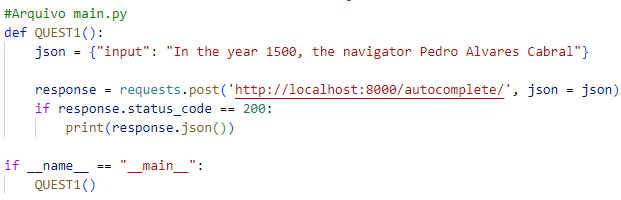

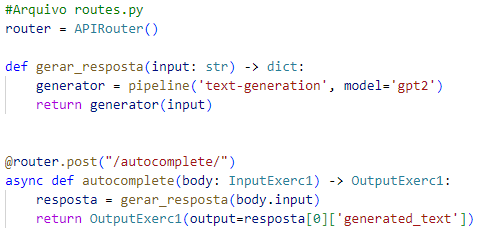

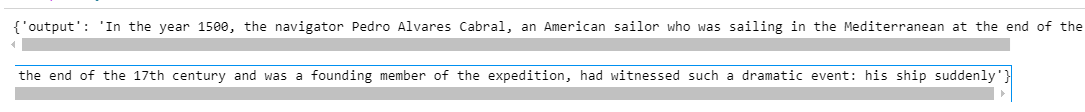

## Questão 2

Crie um aplicativo FastAPI que utiliza o modelo de tradução Helsinki-NLP/opus-mt-en-fr da HuggingFace para traduzir textos do inglês para o francês.

### A aplicação deve:
- Receber um texto em inglês via uma requisição HTTP.
- Traduzir o texto para o francês utilizando o modelo de tradução.
- Retornar o texto traduzido em uma resposta JSON.

### O que é esperado:
- A API deve receber um texto em inglês e retornar sua tradução para o francês, processando tanto frases curtas quanto textos mais longos.

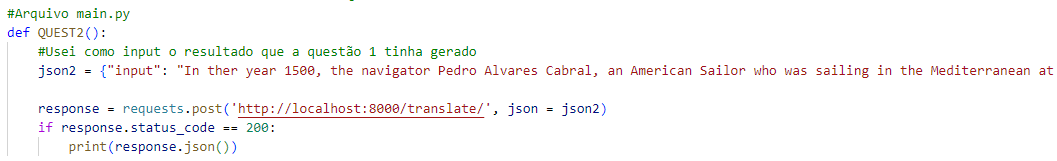

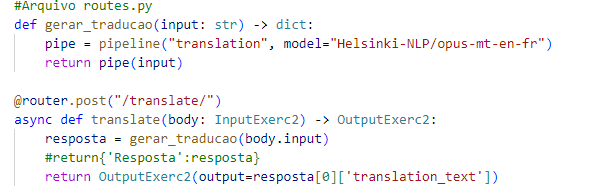

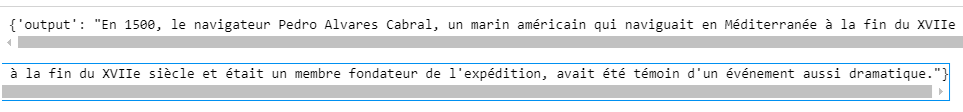

## Questão 3

Com base na API desenvolvida na Questão 2 (Parte 1), explique as principais limitações do modelo de tradução utilizado.

### Enumere e discuta:
- Limitações quanto à precisão da tradução.
- Desafios de tempo de resposta e desempenho em grande escala.
- Restrições de custo e escalabilidade.
- Limitações na tradução de gírias, expressões idiomáticas ou linguagem de contexto.

## Questão 4

Com base no modelo GPT-2 utilizado na Questão 1 (Parte 1), explique as principais limitações do modelo no contexto da geração de texto.

### Discuta:
- A coerência do texto gerado.
- Possíveis falhas ou incoerências geradas por LLMs.
- Desempenho e questões de latência.
- Limitações na geração de conteúdo apropriado.

# Parte 2: LangChain

## Questão 1

Desenvolva um protótipo utilizando LangChain que simule um chatbot simples com Fake LLM.

### A aplicação deve:
- Receber um input de texto via FastAPI.
- Retornar uma resposta simulada pelo Fake LLM.

### O que é esperado:
- O protótipo deve simular um chatbot básico que responde a perguntas pré-definidas.
- A arquitetura deve ser simples, e você deve explicar a importância de usar Fake LLM para testes rápidos.
- Desenhe um diagrama simples da arquitetura do aplicativo, detalhando as principais etapas do fluxo de dados.

## Questão 2

Desenvolva um aplicativo que utilize LangChain para integrar a API da OpenAI.

### O aplicativo deve:
- Receber um texto em inglês via FastAPI.
- Traduzir o texto para o francês utilizando um modelo da OpenAI via LangChain.
- Retornar o texto traduzido em uma resposta JSON.

### O que é esperado:
- O aplicativo deve funcionar como uma API de tradução, semelhante à questão 2 (Parte 1), mas utilizando a OpenAI via LangChain.
- A aplicação deve gerenciar as chamadas à API da OpenAI e retornar a tradução com baixa latência.
- Forneça um diagrama da arquitetura da aplicação, destacando os componentes principais, como FastAPI, LangChain, e OpenAI.

## Questão 3

Crie uma API semelhante à Questão 2 (Parte 2), mas que utilize o modelo Helsinki-NLP/opus-mt-en-de da HuggingFace para traduzir textos do inglês para o alemão.

### A aplicação deve:
- Receber um texto em inglês via FastAPI.
- Utilizar o LangChain para gerenciar as chamadas ao modelo HuggingFace.
- Retornar o texto traduzido para o alemão como resposta JSON.

### O que é esperado:
- O objetivo é que a aplicação funcione de maneira semelhante às Questões 2 (Parte 1) e 2 (Parte 2), mas desta vez integrando LangChain com HuggingFace.
- O modelo a ser utilizado deve ser o Helsinki-NLP/opus-mt-en-de.
- Forneça um diagrama detalhado da arquitetura da aplicação, destacando as interações entre FastAPI, LangChain, e HuggingFace.

## Questão 4

Com base na implementação da Questão 2 (Parte 2), explique as principais limitações de utilizar LangChain para integrar a API da OpenAI.

### Discuta os seguintes aspectos:
- Latência de resposta.
- Limites de uso da API da OpenAI.
- Desafios de escalabilidade e custo.
- Qualidade das traduções geradas em comparação com outros modelos.

## Questão 5

Com base na aplicação desenvolvida na Questão 3 (Parte 2), explique as limitações de usar LangChain para integrar o modelo HuggingFace de tradução.

### Discuta aspectos como:
- Desempenho e tempo de resposta.
- Consumo de recursos computacionais.
- Possíveis limitações no ajuste fino do modelo.
- Comparação com o uso direto da API HuggingFace.

## Questão 6

Com base nas questões 1-2 (Parte 1) e 2-3 (Parte 2), desenvolva uma tabela comparativa que aborde os seguintes critérios:

### Critérios:
- Facilidade de uso/configuração.
- Latência e desempenho.
- Flexibilidade para diferentes modelos.
- Custo e escalabilidade.
- Adequação para protótipos versus aplicações em produção.

### A comparação deve ser apresentada em formato de tabela, com colunas dedicadas a cada critério e linhas comparando FastAPI puro com LangChain.

# Entrega Final

- Todo o código deve ser submetido no GitHub, organizado em repositórios separados para cada questão prática 1-2 (Parte 1) e 1-2-3 (Parte 2).
- Incluir um arquivo README.md com instruções detalhadas sobre como executar cada aplicação.
- As explicações e diagramas para as questões 3-4 (Parte 1) e 4-5-6 (Parte 2) devem ser enviadas em um arquivo PDF, juntamente com os diagramas e tabelas solicitados.
